In [1]:
# 卷积神经网络CNN,由纽约大学Yann LeCun于1989年发明,是一种专门处理高维王个性数据(tensor)而设计的神经网络.
# AlexNet在ILSVARC(ImageNet Large Scale Visual Recognition Challenge)使CNN大放异彩,CNN开始迅速流行.ImageNet由斯坦福的李飞飞主导的数据集.

# 图像识别的分类与定位(CLS-LOC)
#     分类,判断图中物体的类别.top-5错误率,只要5次有一次命中真实类别就算正确分类,最后统计完全没有命中的错误率
#     定位,从图中标识出目标物体所在的位置,用方框框定,以1次错误率为评判标准.
# 目标检测
#     目标检测在定位的基础上更进一步,在图片中同时检测并定位多个类别的物体,具体来说就是在每一张图片中找到属于200个目标类别中的所有物体,
#     最终评判标准是看模型在每一个单独类别中的识别准确率,在多数类别中都获得最高准确率的队伍获胜.2016年平均检出率为66.2%
# 视频目标检测
#     与图片目标检测任务类似,检测出视频中包含的多个类别的物体.
# 场景分类
#     场景分类是要识别图片中的场景,由MIT palces组织,子问题-场景分割,将图片划分成不同的区域
    

In [ ]:
人工神经网络ANN解决图像分类问题的缺点
    1)全连接的网络使得网络中的参数数目过于庞大,收敛速度慢.
    2)全连接的网络结构在处理图像每一个像素时,其相邻像素与距离很远的像素都是无差别的对待,并没有考虑图像内容的空间结构.但一般来说,图像的语义
    并不是以像素为单位,而是各种连续的线条\形状或色块,要让全连接网络通过数据全局学习是非常困难的,不如直接设计一种结构代入人类的先验经验.
    
卷积神经网络:
    至少有一层计算为卷积操作的神经网络.卷积操作是其中的核心,它与全连接结构最大的不同,就是它充分利用了图片中相邻区域的信息,通过稀疏
    连接和权值共享的方式大大减少参数矩阵的规模,从而减少计算量,提高收敛速度.
    
卷积操作
    蓄水池问题
    s(t)=∫x(a)w(t-a)ⅆa--->s(t)=(x⋅a)(t)
    卷积操作实际上是对输入函数的每一个位置进行加权累加.x(t)是输入信号,衰减系数w(t-a)是系统对信号的响应,卷积就是在时刻t对系统观察的结果,
    是所有信号经过系统的处理的叠加.

卷积滤波
    卷积滤波是图像处理中一种常用的线性滤波方法,使用卷积可以达到图像降噪\锐化等多种滤波效果.
    对一张二维图片I和二维卷积核滤波矩阵K,卷积操作可以表示为:
    S(ⅈ,j)=(I⋅k)(ⅈ,j)=∑_m▒∑_n▒I(m,n)k(ⅈ-m,j-n) 
    简单来说,就是对于图片中每一个像素点,计算它的领域像素和滤波器矩阵的对应位置元素的乘积,将所有乘积累加,作为该像素位置的输出值.卷积核依次滑
    过图片中每一个像素位置,就可以输出一张分辨率从来不变的新图片.可以看到,所谓卷积核,实际就是一个权值矩阵,表示如何处理单个像素与其领域像素
    之间的关系.卷积核中各个元素的相对差值越小,相当于每个像素与都与周围像素取了一个平均值,就越有模糊降噪的效果.而卷积核元素的差值越大,就拉大了
    每个像素与周围像素的差距,也就越能提取边缘,或者达到锐化的效果.
    
    在实际应用中,卷积核矩阵的尺寸一般都比较小,主要原因是卷积核尺寸与计算量成正比.一般卷积核矩阵为正方形,并且变长为奇数,如3*3,5*5,7*7,这样
    才能保证有且只有一个中心,输出的时候可以与原图的像素有所对应.当然这也并不是必须的,非对称卷积核同样可以计算.
    
    卷积核矩阵中各个元素的取值,除了影响输出效果以外,还会影响输出图片的亮度.若卷积核内所有元素的累加和等于1,那就基本保持了原图的亮度.若大于1,
    则输出图会变亮,反之,变暗,若卷积核元素累加和为0,输出的亮度会非常低,但并不是全黑,而是大部分面积是黑色,仅有部分图案的边缘还有一些亮度,这样的
    卷积核就可以用于边缘提取.
    
    在卷积核矩阵滑过图片中的每一个像素时,当遇到图像边缘的时候,例如图像顶部的像素,如果把卷积核的中心对应到图像像素,那么卷积核上面几个位置就没
    有与之对应的像素,此时有两种处理方法
      一类叫Valid Padding,直接忽略无法计算的边缘像素,只计算那些能计算的部分.这种做法的输出图片比原始尺寸要小.
      另一类叫Same Padding,对原图的外围进行无限填充(0,或者最邻近边缘像素值,或其它方法)使得边缘像素能够进行合法计算.保证输出尺寸不变.
   
      
    
   
        

In [20]:
import cv2
import numpy as np
image=cv2.imread('C:\\Users\\hzg0601\\Pictures\\pic.jpg')
#cv2.imshow('original',image)#原图

#低通滤波lpf
kernel=np.repeat(1.11,9).reshape((3,3))
rect=cv2.filter2D(image,-1,kernel)#-1指desired depth of the destination image,目标图片深度,若为负值,则与原图深度一致,不得超过原图的深度
cv2.imwrite('C:\\Users\\hzg0601\\Pictures\\rect.jpg',rect)

#高通滤波
kernel=np.array([[1,4,7,6,1],[4,16,26,16,4],[7,26,41,26,7],[4,16,26,16,4],[1,4,7,6,1]])/273.0
gaussian=cv2.filter2D(image,-1,kernel)
cv2.imwrite('C:\\Users\\hzg0601\\Pictures\\gaussian.jpg',gaussian)

#锐化
kernel=np.array([[0,-2,0],[-2,9,-1],[0,-2,0]])
sharpen=cv2.filter2D(image,-1,kernel)
cv2.imwrite('C:\\Users\\hzg0601\\Pictures\\sharpen.jpg',sharpen)

#边缘检测
kernel=np.array([[-1,-1,-1],[-1,8,-1],[0,-2,0]])
edge=cv2.filter2D(image,-1,kernel)
cv2.imwrite('C:\\Users\\hzg0601\\Pictures\\edge.jpg',edge)

#浮雕
kernel=np.array([[-2,-2,-2,-2,0],[-2,-2,-2,0,2],[-2,-2,0,2,2],[-2,0,2,2,2],[0,2,2,2,2]])
emboss=cv2.filter2D(image,-1,kernel)
emboss=cv2.cvtColor(emboss,cv2.COLOR_BGR2GRAY)
cv2.imwrite('C:\\Users\\hzg0601\\Pictures\\emboss.jpg',emboss)

True

Sobel算子利用卷积操作,配合SVM算法可以在行人检测问题上获得不错的结果.但这类经过精心涉及的卷积核局限性颇大:一是,应用有限,二是,人类经验有限.
既然类似Sobel算子本质上是个函数,是不是能用机器学习方法来逼近呢?
卷积操作与反向传播算法相结合,即卷积神经网络.
从网络结构来看,卷积层节点与全连接层节点有三点不同,一是局部感知域,二是权值共享,三是多核卷积.
    1)局部感知域是指,对于每一个计算单元来说,只需要考虑其像素位置附近的输入,并不需要与上一层的所有节点相连.
    与常规神经网络一样，输入层的神经元需要和隐藏层的神经元连接。但是这里不是将每一个输入神经元都与每一个隐藏神经元连接，
    而是仅仅在一个图像的局部区域创建连接。这种稀疏连接的方式可以大大减少参数.
    2)在对每一张图片进行卷积的时候,会让卷积核逐一滑过图片的每个像素,也就是处理每个像素点的参数是相同的.
    3)每个卷积核是一个特征提取器,若只有一个卷积核的话,就只能提取一种特征,这显然是不够的,所以使用多个卷积核.
    每个卷积核都会生成一副新的图像,在卷积网络中,生成的图像叫做特征图(feature maps),可以理解为图片经过滤波后的不同通道(channels).
    https://blog.csdn.net/taigw/article/details/50534376
    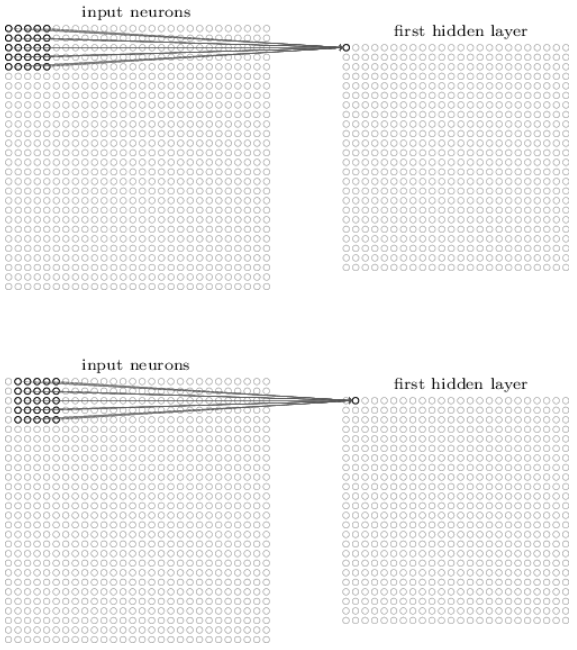
    
    
    
    

import tensorflow as tf

x=tf.placeholder(tf.float32,shape=[None,256,256,3])#输入为256*256,3通道的彩色图片
conv=tf.nn.sonv2d(x,filter=[3,3,3,32],strides=[1,2,2,1],padding='SAME')#3*3的卷积核,3通道色彩,32个卷积核(channel),水平和垂直的为步长均为2
#滑动步长不能超过卷积核的边长?依然可以保持将输入的每个点滑过,但卷积后的输出矩阵将变小

#池化pooling

pool=tf.nn.max_pool(conv,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')#ksize控制池化窗口大小

#池化是将图像按窗口大小划分成不重叠的区域,然后对每一个区域内的元素进行聚合.一般采用2*2的窗口大小,聚合方法有两种,
#一种是取最大值,则称为最大池化(max pooling),一种是取平均值,称为平均池化(average pooling),如对于窗口为2*2的池化操作,处理完的图像只有原图的1/4.
#池化操作不仅仅是为了降维,还为使特征提取拥有平移不变性(translation invariant).也就是说在图像有了几个像素的位移的情况下,依然可以获得稳定的特征集合,例如三个元素（1，5，3）取max就取到5，如果三个元素向右平移一下变成（0，1，5），那取max之后还是5，具备了平移不变性。平移不变性对于图像识别来说具有非常重要的意义,我们更关心有哪些特征能代表物体本身,而不需要精确的位置信息.如五官不标准的人也能被识别为人.
 
 #卷积和池化操作为卷积神经网络加入了很强的先验经验,就是强调图片的局部连续性和相关性,同时保持平移不变性.

#ReLU
#卷积操作实际上是一种线性操作,然而机器学习最重要的理论基础是要将一个特征空间的向量通过非线性变换映射到另一个空间才能实现线性可分,激活函数就是
#引入非线性的手段.传统的sigmoid函数f(x)=1/(1+e**(-x))只有当自变量x取值在0附近的时候,函数的斜率才比较大,根据梯度调整参数才会有比较好的效果.
#而在远离中心的两侧,函数斜率快速减小并趋向于0,导致'梯度消失'问题出现,收敛速度极慢甚至不收敛.

#Rectified Linear Units(ReLU):f(x)=max(0,x),ReLU的取值范围为[0,inf],可以将取值范围映射到所有正数域.而且当x>0,其梯度始终为1,就完全避免了地图消##失的问题,保证参数能够持续收敛.tf.nn.relu/tf.nn.elu(指数线性单元)/tf.nn.relu6(将输入范围限制到0-6之间).
#relu分类效果好,收敛速度快,计算速度快,已经成为CNN模型首选必备的激活函数.

#多层卷积
#深度学习的精髓是利用多层特征组合,将简单的特征组合成复杂的抽象特征,深度卷积神经网络也是如此,整个网络由多个特征提取阶段组成,每个阶段由三种操作
#组成:卷积,池化和非线性激活函数.,这种方式能够逼近复杂的非线性模型,同时又能以简单的方式训练.多个卷积层并不能扩展函数表示域,线性函数的叠加仍然是
#线性函数,而非线性函数的叠加则能够极大的扩展神经网络的表示域.

#由卷积操作的定义可知,在不填充数据的情况下,卷积操作后图像输出结果的尺寸将变小,但通道数会变多.在比较浅的层次(离原图较近),卷积会提取比较细节的
#特征,而在较深的层次,会将前面提取的特征进行二次提取,最后由全连接分类器按照最抽象的特征进行分类,就能够得到比直接处理原始像素图要好得多的结果.

#Dropout
#由于反向传播的梯度方法与训练样本高度相关,易导致过拟合.通常会采取集成学习的方法,将多个表现优秀的模型组合在一起进行预测,但往往代价高昂.
#Dropout技术是多伦多大学的Hinton教授提出的去过拟合技术,具体来说,就是在每一轮训练过程中,随机让一部分隐层节点失效,这样就达到改变网络结构的目的,
#但每个节点的权值都会被保留下来.在最终预测时,打开全部隐层节点,使用完整的网络结构进行计算,就相当于把多个不同结构的网络组合在一起.
#由于隐层节点是随机失效的,所以有n个隐层节点的网络理论上就会产生2^n 个不同的网络结构,并且由于不能保证每2个节点每次都同时出现,就削弱了节点空间的#联合适应性,使得权值的更新不再依赖于有固定关系的隐含节点的共同作用,增强了泛化能力.

#AlexNet将dropout应用在网络中的前两个全连接层,虽然需要两倍的迭代次数才能收敛,但有效防止了过拟合.




In [3]:
#经典的CNN模型
#１ＡlexNet
#    AlexNet整个网络由8层神经元组成,其中前5层为卷积层,用于提取图形特征,后3层为全连接层,用于图像分类.具体来说:
import tensorflow as tf
import tflearn
from tflearn.layers.core import input_data,dropout,fully_connected
from tflearn.layers.conv import conv_2d,max_pool_2d
from tflearn.layers.normalization import local_response_normalization
from tflearn.layers.estimator import regression
import tflearn.datasets.oxflower17 as oxflower17

tf.reset_default_graph()

X,Y=oxflower17.load_data(one_hot=True,resize_pics=(227,227))

network=input_data(shape=[None,227,227,3])

network=conv_2d(network,96,11,strides=4,activation='relu')#96个卷积核,边长为11*11
network=max_pool_2d(network,3,strides=2)#3*3,
network=local_response_normalization(network)

network=conv_2d(network,256,5,activation='relu')#256个卷积核,边长5*5
network=max_pool_2d(network,3,strides=2)#3*3
network=local_response_normalization(network)

network=conv_2d(network,384,3,activation='relu')#第三层和第四层没有池化操作
network=conv_2d(network,384,3,activation='relu')

network=conv_2d(network,256,3,activation='relu')#第五层为卷积和池化
network=max_pool_2d(network,3,strides=2)
network=local_response_normalization(network)

network=fully_connected(network,4096,activation='tanh')#第一层全连接层
network=dropout(network,0.5)#dropout的概率为0.5

network=fully_connected(network,4096,activation='tanh')#第二层全连接层,4096该层的节点数
network=dropout(network,0.5)#dropout的概率为0.5

network=fully_connected(network,17,activation='softmax')#第三层全连接层,softmax输出分类结果

network=regression(network,optimizer='momentum',loss='categorical_crossentropy',learning_rate=0.001)
#定义优化算法\损失函数

model=tflearn.DNN(network,checkpoint_path='model_alexnet',max_checkpoints=1,tensorboard_verbose=2)
#最大checkpoint数目,为1即始终为1个checkpoint,tensorboard_verbose,tensorboard包含的信息,=2即包含loss,accuracy,gradient,weights.
model.fit(X,Y,n_epoch=2,validation_set=0.1,shuffle=True,show_metric=True,batch_size=64,snapshot_step=200,
         snapshot_epoch=False,run_id='alexnet_oxflower17')
#snapshot_epoch/step为每步/每个epoch建立快照信息(简短的summary),show_metric是否显示accuracy

Training Step: 40  | total loss: 2.75437 | time: 330.991s
| Momentum | epoch: 002 | loss: 2.75437 - acc: 0.1294 -- iter: 1224/1224


In [1]:
#VGGNet
#VGGNet诞生于牛津大学视觉几何组(Visual Geometry Group),由8个隐层构成,也是5组卷积层,3层全连接层,
#但VGG的每个卷积层并不是只做一次卷积操作,而是连续卷积2~4次
#VGG16和VGG19,即含16/19层计算参数可以被训练,包含13/16个卷积层和3个全连接层 
#vgg16:2-2-3-3-3,vgg19:2-2-4-4-4
import tensorflow as tf
import tflearn
from tflearn.layers.core import input_data,dropout,fully_connected
from tflearn.layers.conv import conv_2d,max_pool_2d
from tflearn.layers.normalization import local_response_normalization
from tflearn.layers.estimator import regression
import tflearn.datasets.oxflower17 as oxflower17

tf.reset_default_graph()

X,Y=oxflower17.load_data(one_hot=True)

network=input_data(shape=[None,224,224,3])

network=conv_2d(network,64,3,activation='relu')#64个卷积核,卷积核大小为3*3,int or list,第一层第一次卷积
network=conv_2d(network,64,3,activation='relu')#第一层第二次卷积
network=max_pool_2d(network,2,strides=2)#strides,list or int

network=conv_2d(network,128,3,activation='relu')#第二层第一次卷积
network=conv_2d(network,128,3,activation='relu')#第二层第二次卷积
network=max_pool_2d(network,2,strides=2)

network=conv_2d(network,256,3,activation='relu')#第三层第一次卷积
network=conv_2d(network,256,3,activation='relu')#第三层第二次卷积
network=conv_2d(network,256,3,activation='relu')#第三层第三次卷积
network=max_pool_2d(network,2,strides=2)

network=conv_2d(network,512,3,activation='relu')#第四层第一次卷积
network=conv_2d(network,512,3,activation='relu')#第四层第二次卷积
network=conv_2d(network,512,3,activation='relu')#第四层第三次卷积
network=max_pool_2d(network,2,strides=2)

network=conv_2d(network,512,3,activation='relu')#第五层第一次卷积
network=conv_2d(network,512,3,activation='relu')#第五层第二次卷积
network=conv_2d(network,512,3,activation='relu')#第五层第三次卷积
network=max_pool_2d(network,2,strides=2)

network=fully_connected(network,4096,activation='relu')
network=dropout(network,0.5)

network=fully_connected(network,4096,activation='relu')
network=dropout(network,0.5)
network=fully_connected(network,17,activation='softmax')

network=regression(network,optimizer='rmsprop',loss='categorical_crossentropy',learning_rate=0.001)

model=tflearn.DNN(network,checkpoint_path='model_vgg',max_checkpoints=1,tensorboard=3)

model.fit(X,Y,n_epoch=500,shuffle=True,show_metric=True,batch_size=32,sanpshot_step=500,snapshot_epoch=False,run_id='vgg_oxflower17')

E:\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


curses is not supported on this machine (please install/reinstall curses for an optimal experience)
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.


In [7]:
#VGG参数官方网址:http://www.robots.ox.ac.uk/~vgg/reseach/very_deep/,使用训练好的参数,既可以直接应用,也可以构造自己的模型,使用迁移学习的技术,
#将成果应用于其它的图像问题,使用参数构造的图像特征提取网络实现如下:
from scipy.io import loadmat
def vgg19(input_image):
    layers=('conv1_1',"conv1_2",'pool1','conv2_1','conv2_2','pool2',"conv3_1",'conv3_2','conv3_3','conv3_4','pool3'
           'conv4_1','conv4_2','conv4_3',"conv4_4",'pool4','conv5_1','conv5_2','conv5_3','conv5_4','pool5')
    params=loadmat('imagenet-vgg-verydeep-19.mat')
    weights=params['layers'][0]
    network=input_image
    for i ,name in enumerate(layers):
        layer_type=name[:4]
        if layers_type=='conv':
            kernels,bias=weights[i][0][0][0][0]
            kernels=np.transpose(kernels,(1,0,2,3))
        #matconvnet weights:[width,height,in_channels,out_channels]
        #tensorflow weights:[height,width,in_channels,out_channels]
            conv=tf.nn.conv2d(network,tf.constant(kernels),strides=[1,1,1,1],padding="SAME",name=name)
            network=tf.nn.bias_add(conv,bias.reshape(-1))
            network=tf.nn.relu(network)
        elif layer_type=='pool':
            network=tf.nn.max_pool(network,ksize=[1,2,2,1],strides=[1,2,2,1],padding="SAME")
    return network
#VGG的主要贡献在于:展示了识别准确度是可以通过加深卷积网络的深度提高.全部使用3*3的卷积核可以在保证提取效果的同时减少参数数量,
#计算代价更小\收敛速度更快.            
        
        

#GoogLeNet & Inception
#AlexNet/VGGNet以增加层次和深度的方式获得更好的效果,但随着层次和深度的增加,过拟合的风险也更高,计算量也越大,而一些场景中,如自动驾驶,
#对计算速度的要求很高,对模型的参数的参数规模提出了新的要求.为了能有效地扩展网络的复杂度,Google启动了Inception项目,
#GoogLeNet即Inception的第一个版本,目前Inception已经发布了4个版本.
#卷积核大小的确定需要经验和大量实验才能确定,Inception的思路是跳出直线加深网络层数的方式,通过增加'宽度'的方式增加网络的复杂度,避免陷入卷积核
#选择的陷阱,让程序自己学习如何选择卷积核.具体来说,就是在每一层并行使用1*1,3*3,5*5卷积和池化,同时提取不同尺度的特征,然后通过1*1的卷积对每一个
#分支进行降维,最后将结果合并拼接到一起.这种方式不仅可以减少参数,而且由于增加了网络的宽度,网络对多种尺度特征的适应性更好了.

#在这个结构中,1*1卷积扮演了非常重要的角色.1*1卷积并没有对图像本身产生什么影响,在数学上也仅仅是最简单的矩阵乘法操作,其最重要的作用在于
#降低特征图的数量以达到降维的目的.上一层的输出为100x100x128，经过具有256个输出的5x5卷积层之后(stride=1，pad=2)，输出数据为100x100x256。其中，
#卷积层的参数为128x5x5x256。假如上一层输出先经过具有32个输出的1x1卷积层，再经过具有256个输出的5x5卷积层，那么最终的输出数据仍为为100x100x256，#但卷积参数量已经减少为128x1x1x32 + 32x5x5x256，大约减少了4倍。

#AlexNet有6000万个权值参数,VGGNet有18000万个,GoogLeNet只有约500万个,所以在内存受限的环境中,如移动设备上,GoogLeNet有很好的应用前景.


#Inception-v2
#Inception-v2在上一代的基础上加入了批标准化技术(Batch-Normalization).Batch-Normalization可以说是Local Response Normalization的升级版,是加快收
#敛速度的利器,使用它可以在不改变网络结构的情况下以更少的迭代次数达到同样的效果.具体做法是:对mini-batch中所有的信号量进行统一的归一化,使得一个
#批次中所有信号量均符合均值为0,方差为1的高斯分布.这样可以减少因梯度弥散而导致的收敛速度变慢.tf.nn.batch-normalization操作要在激活函数之前.
#(1)梯度弥散:当使用反向传播计算倒数的时候,随着传播层数的增多,误差增大,梯度急剧减少,导致网络最初几层参数修正的幅度趋近于-,不能从样本中得到充分
#的学习.


#Inception-v3
#Inception-v3的核心思想是将卷积操作继续分解成更小的卷积核,如5*5的卷积可以由连续2层3*3的卷积所替代,3*3的卷积可以由非对称的1*3和3*1所替代,经过这#样的转换,不但参数数量再次减少,网络的深度也得到加深,增加了非线性表达能力.
#示例,https://github.com/tensorflow/models/tree/master/tutorials/image/imagenet
#官方文档,https://tensorflow.org/tutorials/image_recognition

#Inception-v4
#Inception-v4借鉴了ResNet深度残差网络,在大大提高训练速度的同时也进一步提高了预测准确度.

https://blog.csdn.net/app_12062011/article/details/62216987

In [ ]:
ResNet
2016年微软亚洲研究院何恺明及其MSRA团队设计了ResNet深度残差网络.其最大的贡献就是通过设计一种残差网络的结构,避免了随着网络层数加深而产生的
梯度消失或梯度爆炸问题,不但使深度神经网络的收敛速度更快\精度更高,而且让加深网络深度成为可能.

VGGNet证明了加深网络层次是提高精度的有效手段,但是由于梯度弥散的问题导致网络深度无法持续增加,梯度弥散问题是由于在反向传播过程中误差不断累积,
导致在最初的几层梯度值几乎为0,从而无法收敛.从而在超过20层后,网络的效果会随网络层数的增加而下降.,即深度网络的退化问题(degradation problem).

神经网络实际上是将一个空间维度向量x,经过非线性变换H(x)映射到另一个空间维度中,由于H(x)非常难以优化,所以尝试求H(x)的残差形式F(x)=H(x)-x,如果
求解F(x)比H(x)要简单一些的话,就可以通过F(x)+x实现最终的目标. 深度神经网络在加入一些捷径连接边后,使其转变为残差结构,收敛效果极具提高,精度随着
训练次数的增加而持续提高,并且不断加深网络深度还可以继续提高准确率.

https://blog.csdn.net/lanran2/article/details/79057994

In [1]:
import tflearn
import tflearn.data_utils as du
import tflearn.datasets.mnist as mnist
from tflearn import conv_2d
from tflearn import residual_bottleneck as rb
import tensorflow as tf


E:\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


curses is not supported on this machine (please install/reinstall curses for an optimal experience)


X,Y,testX,testY=mnist.load_data(one_hot=True)
X=X.reshape([-1,28,28,1])
testX=testX.reshape([-1,28,28,1])
X,mean=du.featurewise_zero_center(X)

#Zero center every sample with specified mean. If not specified, the mean is evaluated over all samples.
#
#A numpy array with same shape as input. Or a tuple (array, mean) if no  mean value was specified.
   
testX=du.featurewise_zero_center(testX,mean)

In [ ]:


tf.reset_default_graph()

net=tflearn.input_data(shape=[None,28,28,1])
net=conv_2d(net,64,3,activation='relu',bias=False)

#使用Bottleneck结构构建参擦块
net=rb(net,3,16,64)
#3,nb_bloacks,Number of layer blocks.
#16,bottleneck_size,TThe number of convolutional filter of the bottleneck convolutional layer
#64,out_channels,The number of convolutional filters of the layers surrounding the bottleneck layer.
#downsample,If True, apply downsampling using 'downsample_strides' for strides.
net=rb(net,1,32,128,downsample=True)
net=rb(net,2,32,128)
net=rb(net,1,64,256,downsample=True)
net=rb(net,2,64,256)
net=tflearn.batch_normalization(net)
net=tflearn.activation(net,'relu')
net=tflearn.global_avg_pool(net)
net=tflearn.fully_connected(net,10,activation='softmax')

#声明优化算法,损失函数,学习率等
net=tflearn.regression(net,optimizer='momentum',loss='categorical_crossentropy',learning_rate=0.1)

model=tflearn.DNN(net,checkpoint_path='model_resnet_mnist',max_checkpoints=1,tensorboard_verbose=2)
model.fit(X,Y,n_epoch=100,validation_set=(testX,testY),show_metric=True,batch_size=256,run_id='resnet_mnist')


Training Step: 58  | total loss: 0.45985 | time: 478.121s
| Momentum | epoch: 001 | loss: 0.45985 - acc: 0.8704 -- iter: 14848/55000


图像风格转换
量化的风格:Gatys:A Neural Algorithm of Artistic Style,纹理合成(teture synthesis) 和风格迁移(style transfer)
        
Gram matrix,用于捕获绘画中的纹理画风.Gram matrix是一组向量内积的对称矩阵,在计算方法是将所有特征图矩阵矢量化后,求其内积之和,它代表了
不同滤波器所得到的结果的相关性,在Gram matrix的作用下,像素级的特征全部被丢弃,甚至全局的场景信息也都没有保留,仅存了高级的绘画风格.
        
通过反卷积操作可以获得图片的场景和轮廓信息,通过纹理合成等重建方法可以获得图片的纹理信息,在此条件下,实现风格迁移变成了一个优化问题.
Gatys等人的论文的核心就是利用预先训练好的VGGNet来提取图片中的内容和风格的数值化特征,然后定义一种特殊的损失函数来评估合成图片符合
'风格'的程度,再然后使用梯度下降的方法来不断修正合唱团的各个像素以使损失变小.
        
具体来说,损失函数是基于VGGNet中的特征图来构建的.损失函数由两部分构成,一部分是内容损失L_c,一部分是风格损失L_s.

内容损失L_c为照片与合成图在VGG19中relu4_2层输出的特征图中每个元素的差的平方和.
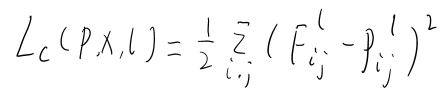
其中p,x分别代表原始内容图和生成图,F^{l}和P^{l}表示它们在l层的特征图,l实际上代表VGG19中的relu4_2层.

风格损失L_ss是风格图与合成图以relu1_1,relu2_1,relu3_1,relu4_1,relu5_1,五层的特征图所求得的Gram matrix矩阵的差的平方和
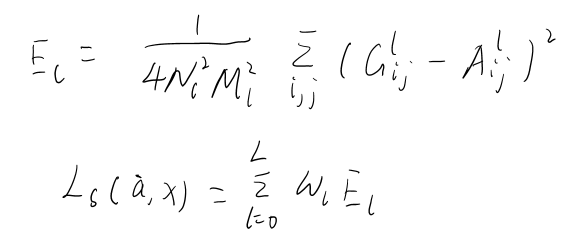
其中a和x分别表示风格图和生成图,A^{l}和G^{l}表示他们在l层特征图的Gram matrix,N和M为Gram matrix的边长,w_{l}为各层风格损失设置的权重,浅层更
注重细节,而深层更注重大片的图案.



风格的滤镜-实时风格迁移方法
Ulyanov Dmity,Texture Network:Feed-forward Synthesis of Texture and Stylized Image
Johnson Justin,Perceptual Losses for Real-Time Style Transfer and Super-Resolution
以Gatys的研究为基础,基于VGGNet所提取出的高维抽象特征构建损失函数,同时使用一个图像变换卷积网络来存储风格的纹理特征,然后将训练好的网络作为滤镜
使用即可完成对图片的风格变换. 

整个系统由两个深度卷积网络组成,一个图像生成网络f_w,以非线性变换y=f_w(x)的方式将输入图片x转换成输出图片y,另一个是损失计算网络,是一个训练好的
确定参数的VGGNet,图像生成网络就是我们最后需要的滤镜.
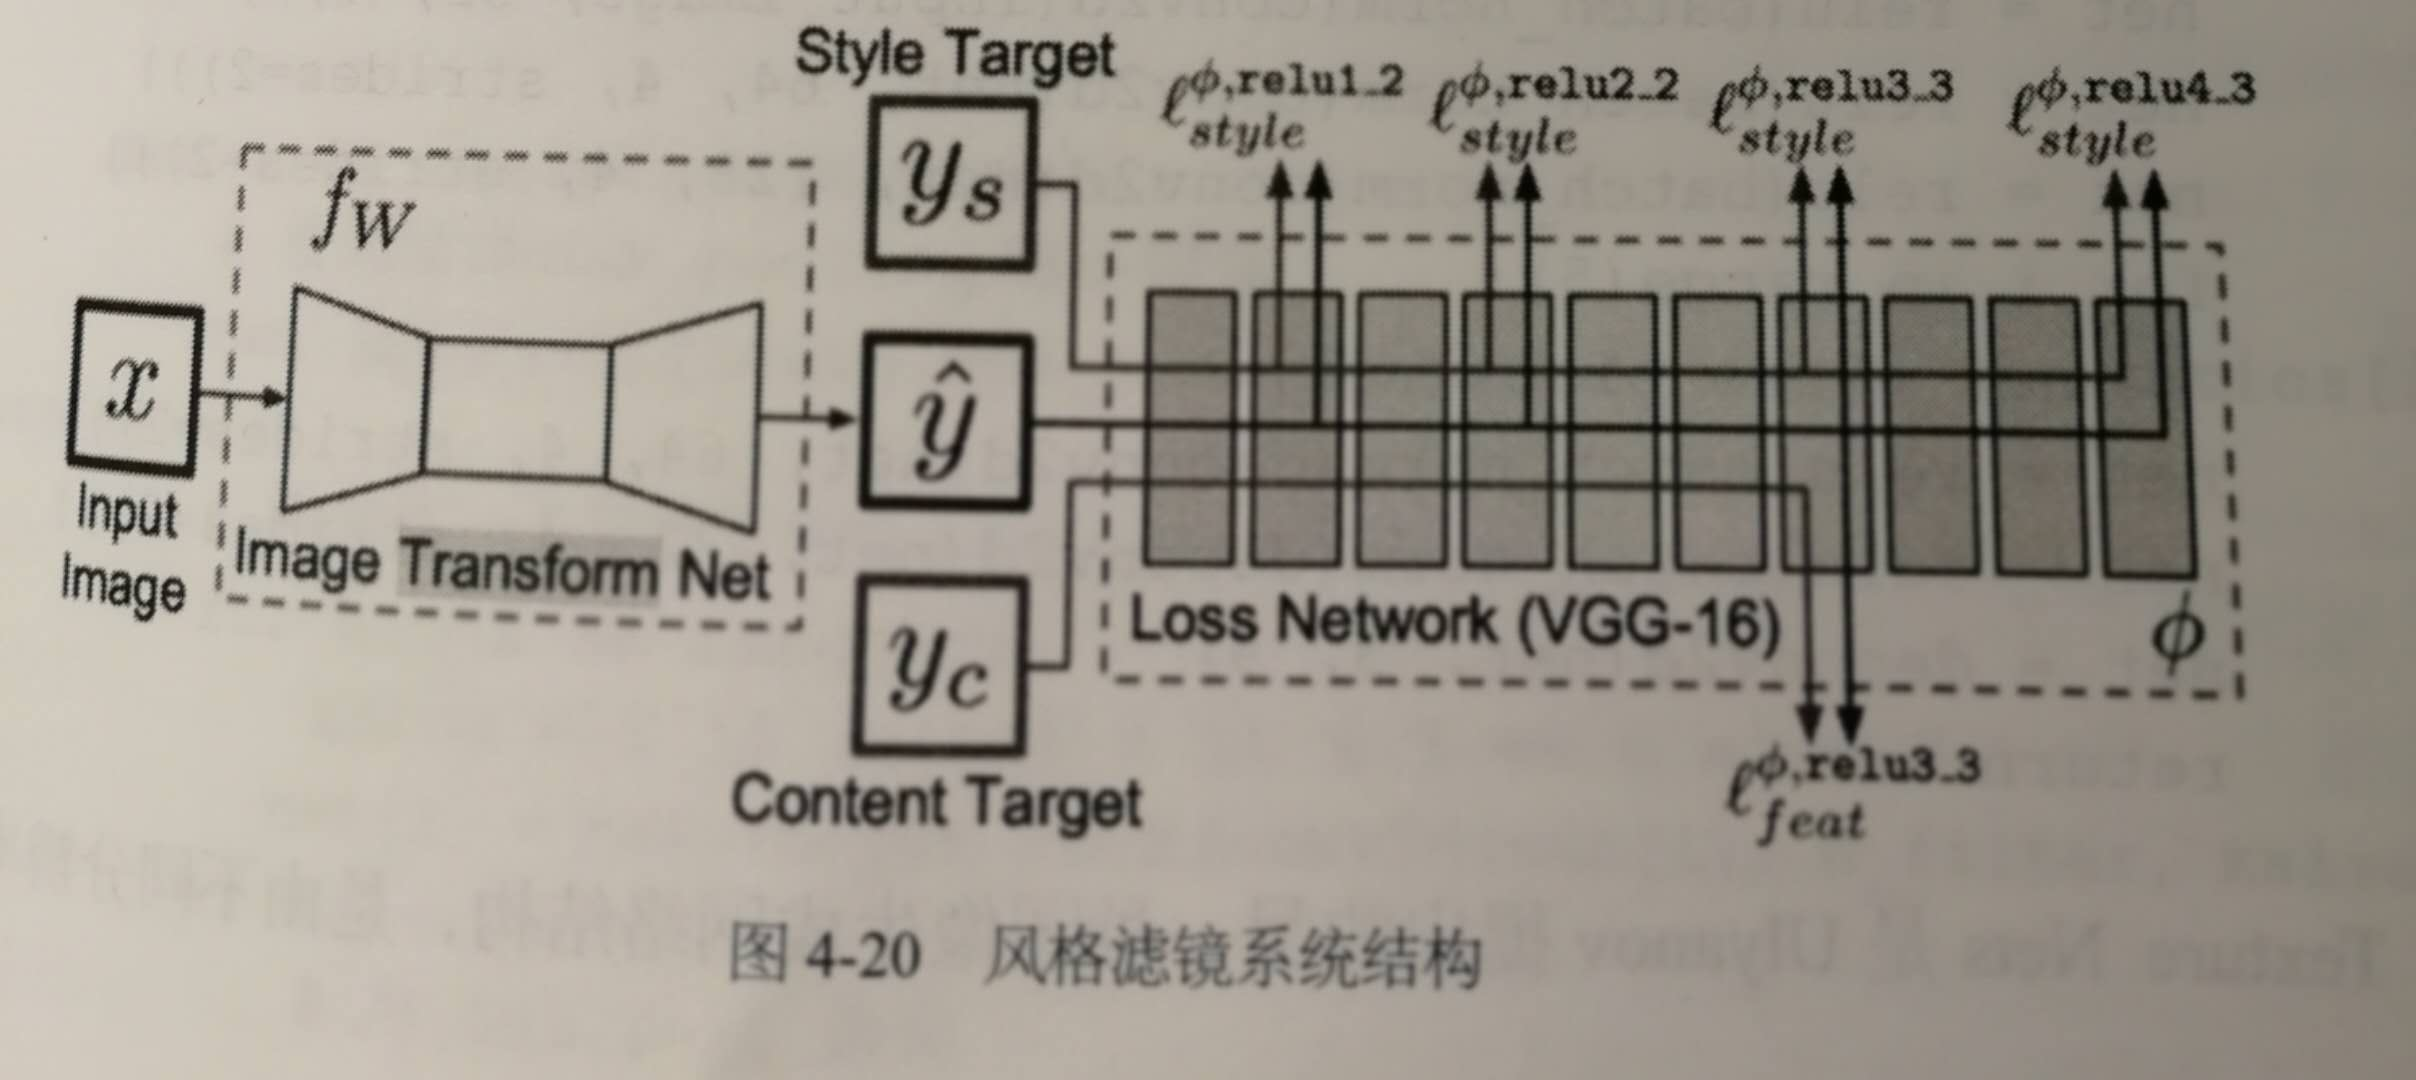
在这样一个系统中,损失的计算与neural style完全相同,要最小化内容损失与风格损失之和.与neural style不同的是,合成图是由图像生成网络生成出来的,所以
梯度下降的传播不会直接改变合成图的像素,而是修改图像生成网络的参数.针对每一种风格,都训练一个单独的图像生成网络,得到一组风格对应的参数.

风格滤镜网络每次都是针对一张风格图进行训练,也就是风格图是固定的,但与此同时内容图不是固定的,否则最终训练的结果就与原始的neural style没有区别
为了使风格对内容充分泛化,不被某张图的内容所限定,需要用多张图片训练网络,使风格能适应任意图片的分布.但Ulyanov后续的研究论文Instance Normalization:The Missing Ingredient for Fast Stylization中发现,使用上万张图片的训练集和长时间的训练反而会造成效果下降.这里的效果指的是人看到
的感受,而不是损失函数的收敛效果.

In [ ]:
#Johnson Nets

In [ ]:
#Ulyanov :Texture Nets